In [1]:
import torch
import numpy as np
from torch.nn import functional as F
import pandas as pd
from torch import nn

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('data/tumors.csv')
data.head()

,leukocyte_count,blood_pressure,tumor_class
0,13.472969,15.250393,malignant
1,10.805510,14.109676,malignant
2,13.834053,15.793920,malignant
3,9.572811,17.873286,malignant
4,7.633667,16.598559,malignant


In [25]:
classes = data['tumor_class'].apply(lambda c: 'red' if c == 'benign' else 'blue')

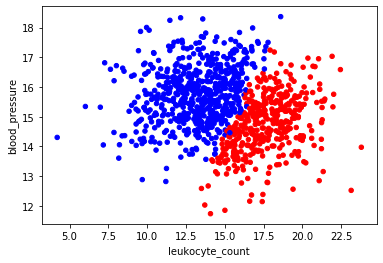

In [27]:
data.plot.scatter(x='leukocyte_count', y='blood_pressure', c=classes);

In [28]:
#train, test = train_test_split(data, test_size=0.2, random_state=42, shuffle=True)
# Defining sets
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15
SHUFFLE = True

# Creating a function
def split(X, y, val_size, test_size, shuffle):
    # split the data into train and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, stratify = y, shuffle = shuffle)
    # split the train set into train and validation set
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = val_size, stratify = y_train, shuffle = shuffle)
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = split(X, y, VAL_SIZE, TEST_SIZE, SHUFFLE)

In [ ]:
ss = StandardScaler().fit(X_train)